# Learning tensors for General Relativity

In [1]:

from sympy import *
from sympy.tensor.tensor import TensorIndexType, TensorIndex, TensorHead, tensor_indices, tensor_heads
from sympy.tensor.toperators import PartialDerivative
init_printing()
import sys
print(sys.version)

3.9.19 (main, May  6 2024, 19:43:03) 
[GCC 11.2.0]


## Christoffel symbols for 2D sphere

In [2]:
theta, phi, R = symbols('theta phi rho')
X = [theta, phi]   # coordinate system
L = TensorIndexType('L', dummy_name='L')
m, n, r, t, q  = tensor_indices('m n r t q', L)
g = tensor_heads('g', [L, L])

### Define the metric

In [3]:
def metric_tensor(which):
    cases = {
        '2-sphere': [[1,0],[0,sin(theta)**2]],
        'polar_plane': [[1, 0],[0, R**2]],
        '3-sphere': [[1,0,0], [0, R**2, 0], [0,0,R**2 * sin(theta)]]
    }
    return cases[which]
    
def test_metric_tensor():
    display(g(m,n))

    for which in '2-sphere', 'polar_plane', '3-sphere':
        display (which, metric_tensor(which))
   
test_metric_tensor()

'2-sphere'

'polar_plane'

'3-sphere'

### Define a "tensor" (not a true tensor) for the Christoffel symbols

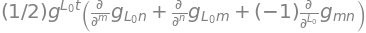

⎡                     ⎡        cos(θ)⎤⎤
⎢                     ⎢  0     ──────⎥⎥
⎢⎡0        0       ⎤  ⎢        sin(θ)⎥⎥
⎢⎢                 ⎥  ⎢              ⎥⎥
⎢⎣0  -sin(θ)⋅cos(θ)⎦  ⎢cos(θ)        ⎥⎥
⎢                     ⎢──────    0   ⎥⎥
⎣                     ⎣sin(θ)        ⎦⎦

In [4]:
def christoffel2(metric):
    x = tensor_heads('_', [L])
    x_repl = {x(q): X}
    metric_repl = {L: metric, g(-m,-n):metric}

    christoffel_exp = g(r,t) / 2 * (PartialDerivative(g(-r, -m), x(n)) + PartialDerivative(g(-r, -n), x(m)) - PartialDerivative(g(-m, -n), x(r)))
    gamma = tensor_heads('Gamma', [L, L, L])
    gamma_repl = {gamma(-m, -n, t):christoffel_exp.replace_with_arrays(x_repl | metric_repl)}
    gamma_result = gamma(-m, -n, t).replace_with_arrays(gamma_repl)
    return christoffel_exp, gamma, gamma_result

def test_christoffel2():
    metric = metric_tensor('2-sphere')
    expression, gamma, result = christoffel2(metric)
    display(expression, gamma(-m, -n, t), result)

test_christoffel2()
    

## Riemann Curvature Tensor $R$

In [5]:
def riemann_curvature(gamma, gamma_result):

    i, j, k  = tensor_indices('i j k', L)
    x = tensor_heads('x', [L])
    x_repl = {x(q): X}
    R_exp = (
        PartialDerivative(gamma(i, -j, -m), x(k)) - 
        PartialDerivative(gamma(i, -j, -k), x(m)) + 
        gamma(i, -r, -k) * gamma(r, -j, -m) - 
        gamma(i, -r, -m) * gamma(r, -j, -k))
    
    R = tensor_heads('R', [L, L, L, L])
    gamma_repl = {gamma(i, -j, -m) : gamma_result}
    R_repl = {R(i, -k, -m, -j): R_exp.replace_with_arrays(x_repl | gamma_repl)}  # swapping final two indices, seems necessary
    result = R(i, -k, -j, -m).replace_with_arrays(R_repl)

    return R_exp, R, result

def show_one(T, Ta, ixstr):
    ixs = [int(c) for c in ixstr]
    print(f'{T}[{ixstr}] = {Ta[ixs]}')
    
def test_riemann_curvature():
    gamma = tensor_heads('Gamma', [L, L, L])
    gamma_result = [[[0, 0], [0, -sin(theta)*cos(theta)]], 
                    [[0, cos(theta)/sin(theta)], [cos(theta)/sin(theta), 0]]]
    R_exp, R, R_result = riemann_curvature(gamma, gamma_result)
    i, j, k  = tensor_indices('i j k', L)
    display(gamma_result)
    display(R_exp)
    display(R(-j, -k, -m, i))
    display(R_result)

    show_one('R', R_result, '0101')
    show_one('R', R_result, '0110')
    show_one('R', R_result, '1010')
    show_one('R', R_result, '1001')

test_riemann_curvature()

⎡         ⎡             2   ⎤⎤
⎢⎡0  0⎤   ⎢   0      sin (θ)⎥⎥
⎢⎢    ⎥   ⎢                 ⎥⎥
⎢⎣0  0⎦   ⎢    2            ⎥⎥
⎢         ⎣-sin (θ)     0   ⎦⎥
⎢                            ⎥
⎢⎡0  -1⎤        ⎡0  0⎤       ⎥
⎢⎢     ⎥        ⎢    ⎥       ⎥
⎣⎣1  0 ⎦        ⎣0  0⎦       ⎦

R[0101] = sin(theta)**2
R[0110] = -sin(theta)**2
R[1010] = 1
R[1001] = -1


## Main program

In [6]:
metric = metric_tensor('2-sphere')

expression, gamma, gamma_result = christoffel2(metric)

R_exp, R, R_result = riemann_curvature(gamma, gamma_result)

i, j, k, m  = tensor_indices('i j k m', L)
display(gamma_result)
display(R_exp)
display(R(-j, -k, -m, i))
display(R_result)


⎡                     ⎡        cos(θ)⎤⎤
⎢                     ⎢  0     ──────⎥⎥
⎢⎡0        0       ⎤  ⎢        sin(θ)⎥⎥
⎢⎢                 ⎥  ⎢              ⎥⎥
⎢⎣0  -sin(θ)⋅cos(θ)⎦  ⎢cos(θ)        ⎥⎥
⎢                     ⎢──────    0   ⎥⎥
⎣                     ⎣sin(θ)        ⎦⎦

⎡         ⎡             2   ⎤⎤
⎢⎡0  0⎤   ⎢   0      sin (θ)⎥⎥
⎢⎢    ⎥   ⎢                 ⎥⎥
⎢⎣0  0⎦   ⎢    2            ⎥⎥
⎢         ⎣-sin (θ)     0   ⎦⎥
⎢                            ⎥
⎢⎡0  -1⎤        ⎡0  0⎤       ⎥
⎢⎢     ⎥        ⎢    ⎥       ⎥
⎣⎣1  0 ⎦        ⎣0  0⎦       ⎦